In [218]:
import pandas as pd
import requests
import numpy as np

In [219]:
# URL API Всемирного банка для получения данных о ВВП на душу населения
url = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?date=2023&format=json&per_page=300"

# Отправляем запрос к API
response = requests.get(url)
data = response.json()

# Проверяем, что данные получены
if len(data) > 1:
    gdp_data = data[1]
    
    # Фильтруем только страны (исключая регионы, у которых нет двухбуквенного кода страны)
    gdp_list = [(entry['country']['value'], entry['value']) for entry in gdp_data 
                if entry['value'] is not None and len(entry['country']['id']) == 2]
    
    # Создаем DataFrame
    df1 = pd.DataFrame(gdp_list, columns=["Country", "GDP_per_cap"])
    
df1.loc[df1['Country'] == 'Korea, Rep.', 'Country'] = 'South Korea'

df1

,Country,GDP_per_cap
0,Africa Eastern and Southern,1659.515290
1,Africa Western and Central,1568.724310
2,Arab World,7292.210408
3,Caribbean small states,16906.567214
4,Central Europe and the Baltics,22637.795011
...,...,...
238,Viet Nam,4282.088517
239,West Bank and Gaza,3372.349744
240,"Yemen, Rep.",477.409029
241,Zambia,1330.727806


In [220]:
df2 = pd.read_csv('unemployment_rate.xls', skiprows = 4)

# оставляем только нужные столбцы
df2 = df2[['Country Name', '2023']]

# переименовываем колонки
df2 = df2.rename(columns = {'2023': 'Unemploym_2023', 'Country Name': 'Country'})

# переименовываем названия стран, чтобы они были одинаковые для всех показателей
df2.loc[df2['Country'] == 'Korea, Rep.', 'Country'] = 'South Korea'
df2.loc[df2['Country'] == 'Venezuela, RB', 'Country'] = 'Venezuela'

# добавляем вручную недостающие значения
df2.loc[len(df2)] = ['Iran', 9]
df2.loc[len(df2)] = ['Slovakia', 5.7]
df2.query("Country.str.contains('Ven', case=False, na=False)")
df2.loc[df2['Country'] == 'China', 'Unemploym_2023'] = 5.1

df2

,Country,Unemploym_2023
0,Aruba,NaN
1,Africa Eastern and Southern,NaN
2,Afghanistan,NaN
3,Africa Western and Central,NaN
4,Angola,NaN
...,...,...
263,South Africa,32.098
264,Zambia,5.861
265,Zimbabwe,9.348
266,Iran,9.000


In [221]:
df3 = pd.read_csv('inflation_data.xls')

# оставляем только нужные столбцы
df3 = df3[['country_name', '2023']]

# переименовываем колонки
df3 = df3.rename(columns = {'2023': 'Inflation_rate', 'country_name': 'Country'})

# добавляем вручную недостающие значения
df3.loc[len(df3)] = ['China', 0.2]
df3.loc[len(df3)] = ['South Korea', 3.6]
df3.loc[len(df3)] = ['Slovakia', 10.5]

df3

,Country,Inflation_rate
0,Afghanistan,9.1
1,Albania,4.8
2,Algeria,9.0
3,Andorra,5.2
4,Angola,13.1
...,...,...
194,Zambia,10.6
195,Zimbabwe,314.5
196,China,0.2
197,South Korea,3.6


In [222]:
df4 = pd.read_excel('gross_monthly_income.xlsx')

# добавляем вручную недостающие значения
df4.loc[len(df4)] = ['United Arab Emirates', 4000]
df4.loc[len(df4)] = ['Venezuela', 150]
df4.loc[len(df4)] = ['Brazil', 570]
df4.loc[len(df4)] = ['India', 280]
df4.loc[len(df4)] = ['Indonesia', 530]

df4

,Country,Gross_monthly_wage
0,Bermuda,NaN
1,Norway,5443.0
2,Switzerland,8757.0
3,Luxembourg,7291.0
4,United States,6676.0
...,...,...
92,United Arab Emirates,4000.0
93,Venezuela,150.0
94,Brazil,570.0
95,India,280.0


In [223]:
df5 = pd.read_excel('business_complexity_index.xlsx')

# переименовываем колонки
df5 = df5.rename(columns = {'Global_business_complexity_inx_2023': 'Business_complexity_inx'})

# переименовываем названия стран, чтобы они были одинаковые для всех показателей
df5.loc[df5['Country'] == 'Russia', 'Country'] = 'Russian Federation'
df5.loc[df5['Country'] == 'UAE', 'Country'] = 'United Arab Emirates'
df5.loc[df5['Country'] == 'The Netherlands', 'Country'] = 'Netherlands'
df5.loc[df5['Country'] == 'Republic of Ireland', 'Country'] = 'Ireland'

# заменяем отсутствующие значения на ''
df5.loc[len(df5)] = ['Saudi Arabia', '']
df5.loc[len(df5)] = ['Estonia', '']
df5.loc[len(df5)] = ['Iran', '']

df5

,Country,Business_complexity_inx
0,France,1
1,Greece,2
2,Brazil,3
3,Mexico,4
4,Colombia,5
...,...,...
76,Denmark,77
77,Cayman Islands,78
78,Saudi Arabia,
79,Estonia,


In [224]:
df6 = pd.read_excel('corporate_tax_rate.xlsx')

# заменяем отсутствующие значения на процентный формат
df6['Corporate_Tax_Rate'] = df6['Corporate_Tax_Rate'].apply(lambda x: f'{x:.1f}%' if pd.notna(x) else np.nan)

# переименовываем названия стран, чтобы они были одинаковые для всех показателей
df6.loc[df6['Country'] == 'United States of America', 'Country'] = 'United States'
df6.loc[df6['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'United Kingdom'
df6.loc[df6['Country'] == 'Republic of Korea', 'Country'] = 'South Korea'
df6.loc[df6['Country'] == 'Venezuela (Bolivarian Republic of)', 'Country'] = 'Venezuela'

# добавляем вручную недостающие значения
df6.loc[len(df6)] = ['Iran', '25%']

df6

,Country,Corporate_Tax_Rate
0,Aruba,22.0%
1,Afghanistan,20.0%
2,Angola,25.0%
3,Anguilla,0.0%
4,Aland Islands,20.0%
...,...,...
247,Yemen,20.0%
248,South Africa,27.0%
249,Zambia,30.0%
250,Zimbabwe,24.7%


In [225]:
df7 = pd.read_excel('venture_capital_funding.xlsx', engine = 'openpyxl')
# измеряется в миллионах USD

# переименовываем колонки
df7 = df7.rename(columns = {'Unnamed: 0': 'Country', 'Unnamed: 1': 'Venture_cap_inv'})

# добавляем вручную недостающие значения
df7.loc[len(df7)] = ['Russian Federation', 118]

# заменяем отсутствующие значения на ''
df7.loc[len(df7)] = ['Luxembourg', '']
df7.loc[len(df7)] = ['South Africa', '']
df7.loc[len(df7)] = ['Cyprus', '']
df7.loc[len(df7)] = ['Estonia', '']
df7.loc[len(df7)] = ['Iran', '']
df7.loc[len(df7)] = ['Argentina', '']
df7.loc[len(df7)] = ['Slovakia', '']
df7.loc[len(df7)] = ['Venezuela', '']
df7.loc[len(df7)] = ['Mexico', '']
df7.loc[len(df7)] = ['Thailand', '']
df7.loc[len(df7)] = ['Poland', '']

df7

,Country,Venture_cap_inv
0,United States,15000
1,China,4166
2,United Kingdom,2992
3,India,1899
4,Canada,1483
5,France,1409
6,South Korea,1293
7,Germany,1259
8,Japan,1063
9,Spain,882


In [226]:
df8 = pd.read_excel('total_startup_output.xlsx')

# переименовываем названия стран, чтобы они были одинаковые для всех показателей
df8.loc[df8['Country'] == 'Russia', 'Country'] = 'Russian Federation'
df8.loc[df8['Country'] == 'The Netherlands', 'Country'] = 'Netherlands'

# меняем формат значений на float
df8['Total_Startup_Output'].astype(float)

df8

,Country,Total_Startup_Output
0,United States,3525.421
1,China,651.574
2,United Kingdom,385.112
3,India,338.565
4,Germany,198.668
5,Canada,189.175
6,France,158.288
7,Israel,131.338
8,Japan,113.052
9,Brazil,104.016


In [227]:
df = df1
dfs = [df2, df3, df4, df5, df6, df7, df8] # собираем все показатели в один датафрейм

# запускаем цикл для объединения
for i in dfs:
    df = df.merge(i, on = 'Country', how = 'outer')
    
df = df.sort_values(by = 'Country') # сортируем по странам
df = df.reset_index(drop = True)

df

,Country,GDP_per_cap,Unemploym_2023,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Afghanistan,415.707417,NaN,9.1,NaN,NaN,20.0%,NaN,NaN
1,Africa Eastern and Southern,1659.515290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,1568.724310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aland Islands,NaN,NaN,NaN,NaN,NaN,20.0%,NaN,NaN
4,Albania,8575.171134,10.669,4.8,701.0,NaN,15.0%,NaN,NaN
...,...,...,...,...,...,...,...,...,...
347,World,13169.598225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Yemen,NaN,NaN,14.9,NaN,NaN,20.0%,NaN,NaN
349,"Yemen, Rep.",477.409029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,Zambia,1330.727806,5.861,10.6,NaN,NaN,30.0%,NaN,NaN


In [228]:
# заменяем все Nan или пустые значения на нули для удобства работы
df = df.replace('', 0)
df = df.replace('NaN', 0)
df = df.fillna(0)

df

,Country,GDP_per_cap,Unemploym_2023,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Afghanistan,415.707417,0.000,9.1,0.0,0.0,20.0%,0.0,0.0
1,Africa Eastern and Southern,1659.515290,0.000,0.0,0.0,0.0,0,0.0,0.0
2,Africa Western and Central,1568.724310,0.000,0.0,0.0,0.0,0,0.0,0.0
3,Aland Islands,0.000000,0.000,0.0,0.0,0.0,20.0%,0.0,0.0
4,Albania,8575.171134,10.669,4.8,701.0,0.0,15.0%,0.0,0.0
...,...,...,...,...,...,...,...,...,...
347,World,13169.598225,0.000,0.0,0.0,0.0,0,0.0,0.0
348,Yemen,0.000000,0.000,14.9,0.0,0.0,20.0%,0.0,0.0
349,"Yemen, Rep.",477.409029,0.000,0.0,0.0,0.0,0,0.0,0.0
350,Zambia,1330.727806,5.861,10.6,0.0,0.0,30.0%,0.0,0.0


In [229]:
countries = ['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'India', 'Indonesia', 'Israel', 'Italy', 'Japan', 'Netherlands',
       'Russian Federation', 'Singapore', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States']

df_new = df[df['Country'].isin(countries)]
df_new

,Country,GDP_per_cap,Unemploym_2023,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
16,Australia,64820.911789,3.668,5.8,5390.0,60.0,30.0%,717.0,88.259
36,Brazil,10294.866681,7.947,4.7,0.0,3.0,34.0%,575.0,104.016
37,Brazil,10294.866681,7.947,4.7,570.0,3.0,34.0%,575.0,104.016
47,Canada,53431.185706,5.415,3.6,5004.0,48.0,26.2%,1483.0,189.175
55,China,12614.061742,5.100,0.2,1392.0,15.0,25.0%,4166.0,651.574
108,France,44690.934540,7.335,5.6,3928.0,1.0,25.8%,1409.0,158.288
116,Germany,54343.226508,3.068,6.3,4352.0,25.0,29.9%,1259.0,198.668
145,India,2480.792087,4.172,5.5,0.0,33.0,30.0%,1899.0,338.565
146,India,2480.792087,4.172,5.5,280.0,33.0,30.0%,1899.0,338.565
147,Indonesia,4876.314327,3.308,3.6,0.0,11.0,22.0%,241.0,52.156


In [230]:
countries = ['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Israel', 'Italy', 'Japan', 'Netherlands', 'Russian Federation', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States',
'Argentina', 'Austria', 'Belgium', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'Greece', 'Hungary', 'Ireland', 'Kazakhstan', 'Malaysia', 'Mexico', 'New Zealand', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'South Africa', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'Vietnam', 'Bangladesh', 'Serbia', 'Slovakia', 'Croatia', 'Bulgaria', 'Ecuador', 'Venezuela', 'Nigeria', 'Algeria', 'Morocco', 'Qatar']

df_new = df[df['Country'].isin(countries)]
df_new = df_new.reset_index(drop = True)
df_new # новый датафрейм, тут много пропущенных значений

df_new = df_new.replace('', 0)
df_new = df_new.replace('NaN', 0)
df_new = df_new.fillna(0)
df_new # теперь где у нас нет значений мы проставили нолики для удобства

,Country,GDP_per_cap,Unemploym_2023,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Algeria,5364.027950,0.000,9.0,0.0,0.0,26.0%,0.0,0.000
1,Argentina,14187.482725,6.139,121.7,0.0,10.0,35.0%,0.0,0.000
2,Australia,64820.911789,3.668,5.8,5390.0,60.0,30.0%,717.0,88.259
3,Austria,56033.573792,5.264,7.8,4798.0,34.0,24.0%,0.0,0.000
4,Bangladesh,2551.017727,0.000,9.0,351.0,0.0,27.5%,0.0,0.000
...,...,...,...,...,...,...,...,...,...
59,United Arab Emirates,49040.694753,2.151,3.1,4000.0,53.0,9.0%,356.0,0.000
60,United Kingdom,49463.855462,4.025,7.7,4460.0,72.0,25.0%,2992.0,385.112
61,United States,82769.412211,3.638,4.1,6676.0,68.0,25.8%,15000.0,3525.421
62,Venezuela,0.000000,0.000,360.0,150.0,22.0,34.0%,0.0,0.000


In [231]:
df_new.to_excel('df_new.xlsx', index = False) 

In [232]:
df_final = pd.read_excel('df_new.xlsx')

df_final['Corporate_Tax_Rate'] = df_final['Corporate_Tax_Rate'].str[:-1].astype(float)

# для создания модели 20 стран было недостаточно (квадрат количества наших столбцов был больше, чем количество наших строк)
# поэтому мы расширили датасет до 60 стран, заменив пропущенные значения на среднее по всему столбцу

# звменяем нули на NaN
df_final['Gross_monthly_wage'] = df_final['Gross_monthly_wage'].replace(0, pd.NA)
df_final['GDP_per_cap'] = df_final['GDP_per_cap'].replace(0, pd.NA)
df_final['Unemploym_2023'] = df_final['Unemploym_2023'].replace(0, pd.NA)
df_final['Inflation_rate'] = df_final['Inflation_rate'].replace(0, pd.NA)
df_final['Business_complexity_inx'] = df_final['Business_complexity_inx'].replace(0, pd.NA)
df_final['Corporate_Tax_Rate'] = df_final['Corporate_Tax_Rate'].replace(0, pd.NA)
df_final['Venture_cap_inv'] = df_final['Venture_cap_inv'].replace(0, pd.NA)
df_final['Total_Startup_Output'] = df_final['Total_Startup_Output'].replace(0, pd.NA)


# заполнили NaN средним значением
df_final['Gross_monthly_wage'] = df_final['Gross_monthly_wage'].fillna(df_final['Gross_monthly_wage'].mean())
df_final['GDP_per_cap'] = df_final['GDP_per_cap'].fillna(df_final['GDP_per_cap'].mean())
df_final['Unemploym_2023'] = df_final['Unemploym_2023'].fillna(df_final['Unemploym_2023'].mean())
df_final['Inflation_rate'] = df_final['Inflation_rate'].fillna(df_final['Inflation_rate'].mean())
df_final['Business_complexity_inx'] = df_final['Business_complexity_inx'].fillna(df_final['Business_complexity_inx'].mean())
df_final['Corporate_Tax_Rate'] = df_final['Corporate_Tax_Rate'].fillna(df_final['Corporate_Tax_Rate'].mean())
df_final['Venture_cap_inv'] = df_final['Venture_cap_inv'].fillna(df_final['Venture_cap_inv'].mean())
df_final['Total_Startup_Output'] = df_final['Total_Startup_Output'].fillna(df_final['Total_Startup_Output'].mean())

# округлили
df_final['Gross_monthly_wage'] = df_final['Gross_monthly_wage'].round(1)
df_final['GDP_per_cap'] = df_final['GDP_per_cap'].round(1)
df_final['Unemploym_2023'] = df_final['Unemploym_2023'].round(1)
df_final['Inflation_rate'] = df_final['Inflation_rate'].round(1)
df_final['Business_complexity_inx'] = df_final['Business_complexity_inx'].round(1)
df_final['Corporate_Tax_Rate'] = df_final['Corporate_Tax_Rate'].round(1)
df_final['Venture_cap_inv'] = df_final['Venture_cap_inv'].round(1)
df_final['Total_Startup_Output'] = df_final['Total_Startup_Output'].round(1)

df_final = df_final.rename(columns = {'Unemploym_2023': 'Unemploym_rate'})

df_final

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Algeria,5364.0,5.6,9.0,2878.4,34.5,26.0,1402.5,302.3
1,Argentina,14187.5,6.1,121.7,2878.4,10.0,35.0,1402.5,302.3
2,Australia,64820.9,3.7,5.8,5390.0,60.0,30.0,717.0,88.3
3,Austria,56033.6,5.3,7.8,4798.0,34.0,24.0,1402.5,302.3
4,Bangladesh,2551.0,5.6,9.0,351.0,34.5,27.5,1402.5,302.3
...,...,...,...,...,...,...,...,...,...
59,United Arab Emirates,49040.7,2.2,3.1,4000.0,53.0,9.0,356.0,302.3
60,United Kingdom,49463.9,4.0,7.7,4460.0,72.0,25.0,2992.0,385.1
61,United States,82769.4,3.6,4.1,6676.0,68.0,25.8,15000.0,3525.4
62,Venezuela,31588.4,5.6,360.0,150.0,22.0,34.0,1402.5,302.3


In [233]:
df_final = df_final.drop([6, 23, 25])
df_final = df_final.reset_index(drop = True)
df_final

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Algeria,5364.0,5.6,9.0,2878.4,34.5,26.0,1402.5,302.3
1,Argentina,14187.5,6.1,121.7,2878.4,10.0,35.0,1402.5,302.3
2,Australia,64820.9,3.7,5.8,5390.0,60.0,30.0,717.0,88.3
3,Austria,56033.6,5.3,7.8,4798.0,34.0,24.0,1402.5,302.3
4,Bangladesh,2551.0,5.6,9.0,351.0,34.5,27.5,1402.5,302.3
...,...,...,...,...,...,...,...,...,...
56,United Arab Emirates,49040.7,2.2,3.1,4000.0,53.0,9.0,356.0,302.3
57,United Kingdom,49463.9,4.0,7.7,4460.0,72.0,25.0,2992.0,385.1
58,United States,82769.4,3.6,4.1,6676.0,68.0,25.8,15000.0,3525.4
59,Venezuela,31588.4,5.6,360.0,150.0,22.0,34.0,1402.5,302.3


In [234]:
# код для создания датасета из 20 стран, где значения по всем столбцам были изначально

df_20 = df1
dfs = [df2, df3, df4, df5, df6, df7, df8]

for i in dfs:
    df_20 = df_20.merge(i, on = 'Country', how = 'inner')
df_20 = df_20.sort_values(by = 'Country')
df_20 = df_20.reset_index(drop = True)
df_20 = df_20.drop([1, 7, 9])
df_20 = df_20.reset_index(drop = True)

df_20 = df_20.rename(columns = {'Unemploym_2023': 'Unemploym_rate'})

df_20

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Australia,64820.911789,3.668,5.8,5390.0,60,30.0%,717,88.259
1,Brazil,10294.866681,7.947,4.7,570.0,3,34.0%,575,104.016
2,Canada,53431.185706,5.415,3.6,5004.0,48,26.2%,1483,189.175
3,China,12614.061742,5.100,0.2,1392.0,15,25.0%,4166,651.574
4,France,44690.934540,7.335,5.6,3928.0,1,25.8%,1409,158.288
5,Germany,54343.226508,3.068,6.3,4352.0,25,29.9%,1259,198.668
6,India,2480.792087,4.172,5.5,280.0,33,30.0%,1899,338.565
7,Indonesia,4876.314327,3.308,3.6,530.0,11,22.0%,241,52.156
8,Israel,52642.426749,3.371,4.3,3507.0,63,23.0%,461,131.338
9,Italy,39003.316095,7.627,6.0,2924.0,8,27.8%,463,37.126


In [235]:
# Этот код выполняет расширенный описательный анализ данных, ...
# ... добавляя к стандартной статистике (среднее, стандартное отклонение, минимум, максимум и т.д.) ...
# ... важные метрики: медиану, асимметрию (skewness) и эксцесс (kurtosis).

from scipy.stats import skew, kurtosis

desc_stats = df_final.describe()

desc_stats.loc['median'] = df_final.median(numeric_only = True)
desc_stats.loc['skewness'] = df_final.apply(lambda x: skew(x.dropna()) if pd.api.types.is_numeric_dtype(x) else None)
desc_stats.loc['kurtosis'] = df_final.apply(lambda x: kurtosis(x.dropna()) if pd.api.types.is_numeric_dtype(x) else None)

desc_stats

,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Business_complexity_inx,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,32852.518033,5.624590,15.073770,2878.432787,35.393443,23.808197,1426.959016,309.042623
std,26797.070660,4.027475,47.562373,1775.618987,21.234821,6.221744,1880.458232,432.526128
min,1365.300000,0.700000,0.200000,150.000000,1.000000,9.000000,118.000000,37.100000
25%,11379.100000,3.600000,4.000000,1554.000000,17.000000,20.000000,722.000000,198.700000
50%,31588.400000,5.500000,5.800000,2878.400000,34.500000,25.000000,1402.500000,302.300000
75%,52642.400000,5.600000,9.000000,4000.000000,52.000000,27.800000,1402.500000,302.300000
max,103887.800000,32.100000,360.000000,8757.000000,77.000000,35.000000,15000.000000,3525.400000
median,31588.400000,5.500000,5.800000,2878.400000,34.500000,25.000000,1402.500000,302.300000
skewness,0.859633,4.819980,6.591143,0.672571,0.171860,-0.533700,6.333122,6.882648


In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

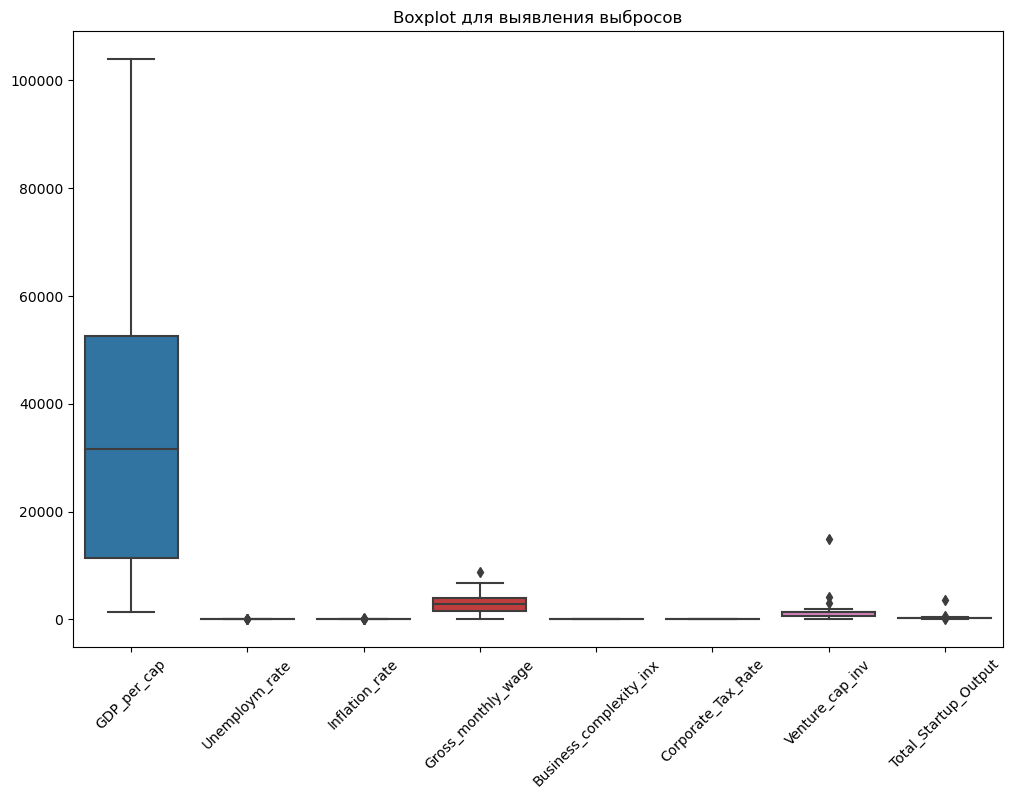

In [237]:
# Анализ выбросов с помощью boxplot
plt.figure(figsize = (12, 8))
sns.boxplot(data = df_final.drop(columns = ['Country']))
plt.title('Boxplot для выявления выбросов')
plt.xticks(rotation = 45)
plt.show()

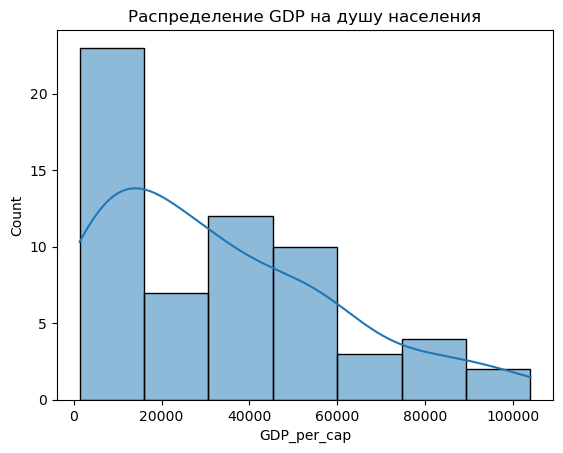

In [238]:
# Визуализация распределения GDP_per_cap
sns.histplot(df_final['GDP_per_cap'], kde = True)
plt.title('Распределение GDP на душу населения')
plt.show()

In [239]:
from tabulate import tabulate

# Топ-10 стран по ВВП на душу населения
top_gdp = df_final.nlargest(10, 'GDP_per_cap')[['Country', 'GDP_per_cap']]
print('Топ-10 стран по ВВП на душу населения:')
print(tabulate(top_gdp, headers = 'keys', tablefmt = 'pretty', showindex = False))

# Топ-10 стран по объему венчурных инвестиций
top_venture = df_final.nlargest(10, 'Venture_cap_inv')[['Country', 'Venture_cap_inv']]
print('\nТоп-10 стран по объему венчурных инвестиций:')
print(tabulate(top_venture, headers = 'keys', tablefmt = 'pretty', showindex = False))

# Топ-10 стран по общему объему стартапов
top_startup_output = df_final.nlargest(10, 'Total_Startup_Output')[['Country', 'Total_Startup_Output']]
print('\nТоп-10 стран по общему объему стартапов:')
print(tabulate(top_startup_output, headers='keys', tablefmt = 'pretty', showindex = False))

# Топ-10 стран по низкому уровню безработицы
top_low_unemployment = df_final.nsmallest(10, 'Unemploym_rate')[['Country', 'Unemploym_rate']]
print('\nТоп-10 стран по низкому уровню безработицы:')
print(tabulate(top_low_unemployment, headers = 'keys', tablefmt = 'pretty', showindex = False))

# Топ-10 стран по низкому уровню инфляции
top_low_inflation = df_final.nsmallest(10, 'Inflation_rate')[['Country', 'Inflation_rate']]
print('\nТоп-10 стран по низкому уровню инфляции:')
print(tabulate(top_low_inflation, headers = 'keys', tablefmt = 'pretty', showindex = False))

Топ-10 стран по ВВП на душу населения:
+---------------+-------------+
|    Country    | GDP_per_cap |
+---------------+-------------+
|    Ireland    |  103887.8   |
|  Switzerland  |   99564.7   |
|    Norway     |   87925.1   |
|   Singapore   |   84734.3   |
| United States |   82769.4   |
|     Qatar     |   80195.9   |
|    Denmark    |   68453.9   |
|   Australia   |   64820.9   |
|  Netherlands  |   64572.0   |
|    Austria    |   56033.6   |
+---------------+-------------+

Топ-10 стран по объему венчурных инвестиций:
+----------------+-----------------+
|    Country     | Venture_cap_inv |
+----------------+-----------------+
| United States  |     15000.0     |
|     China      |     4166.0      |
| United Kingdom |     2992.0      |
|     India      |     1899.0      |
|     Canada     |     1483.0      |
|     France     |     1409.0      |
|    Algeria     |     1402.5      |
|   Argentina    |     1402.5      |
|    Austria     |     1402.5      |
|   Bangladesh   |     

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


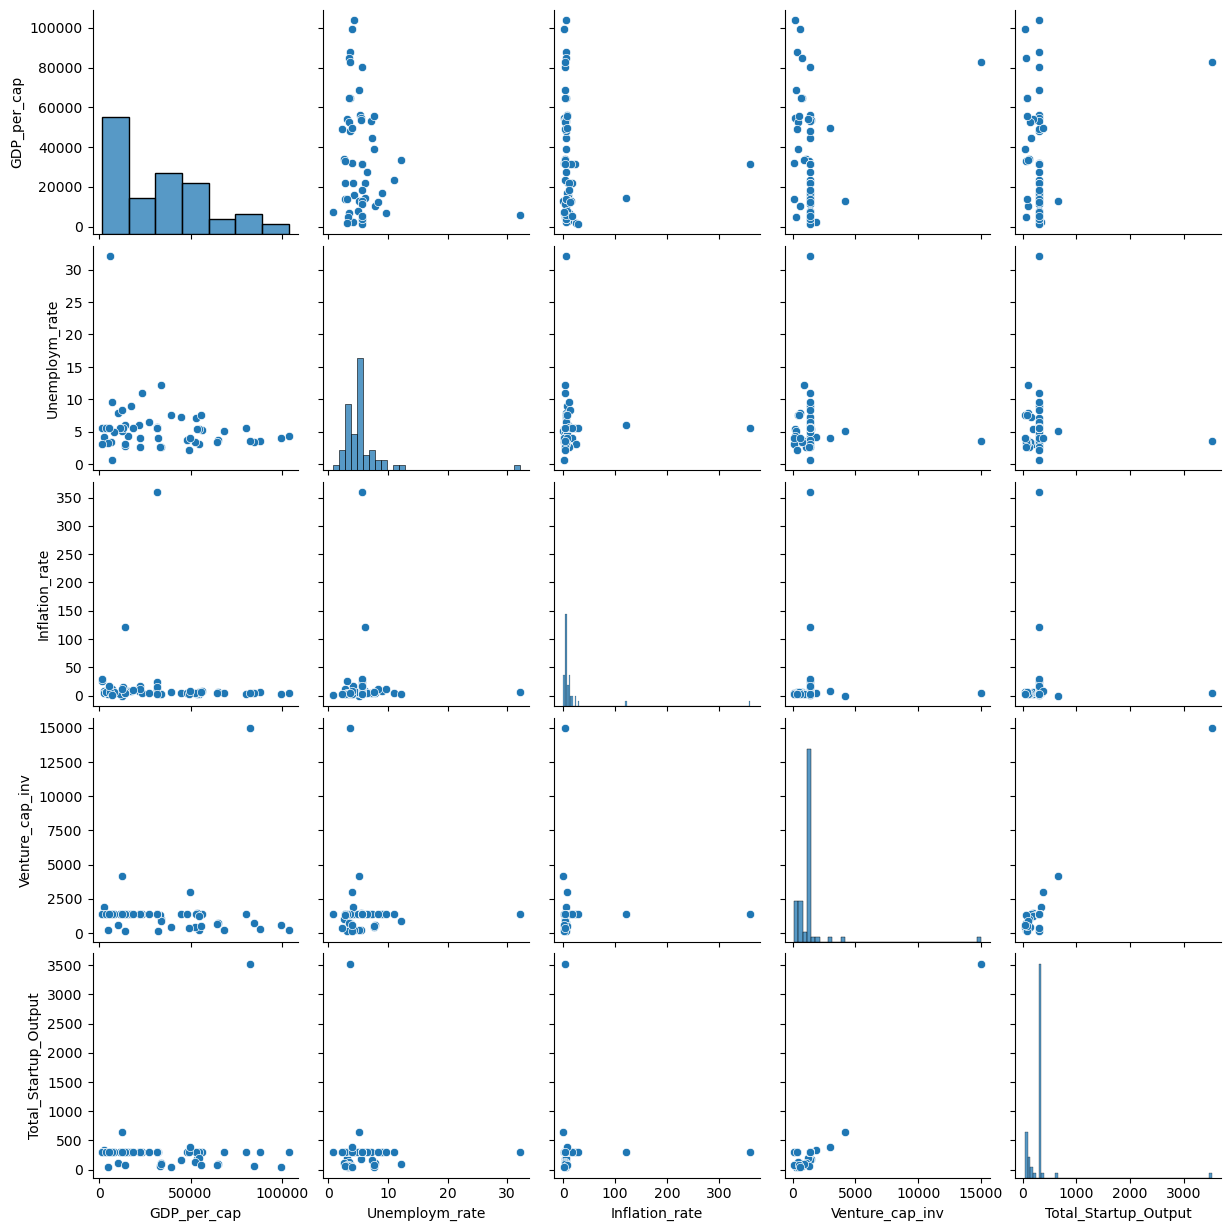

In [240]:
# РЕПРЕЗЕНТАТИВНЫЙ график с выбросами для 60 стран

sns.pairplot(df_final[['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Venture_cap_inv', 'Total_Startup_Output']])
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


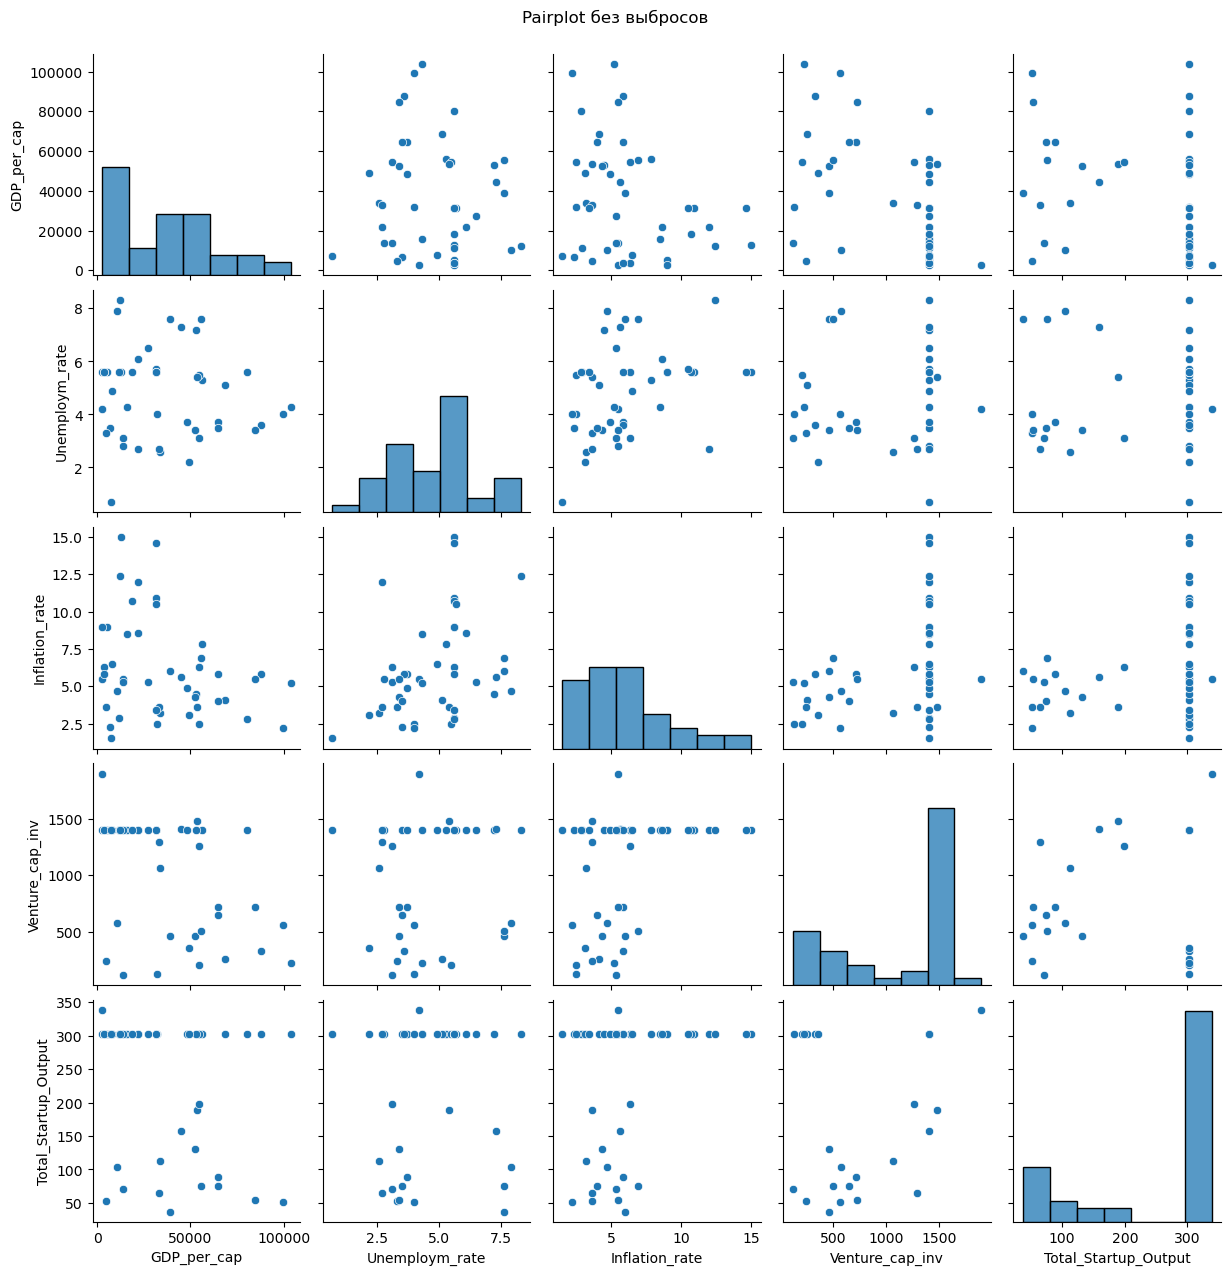

In [241]:
# РЕПРЕЗЕНТАТИВНЫЙ график без выбросов для 60 стран

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_clean = ['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Venture_cap_inv', 'Total_Startup_Output']
df_cleaned = df_final.copy()

for column in columns_to_clean:
    df_cleaned = remove_outliers(df_cleaned, column)

sns.pairplot(df_cleaned[['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Venture_cap_inv', 'Total_Startup_Output']])
plt.suptitle('Pairplot без выбросов', y = 1.02)
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


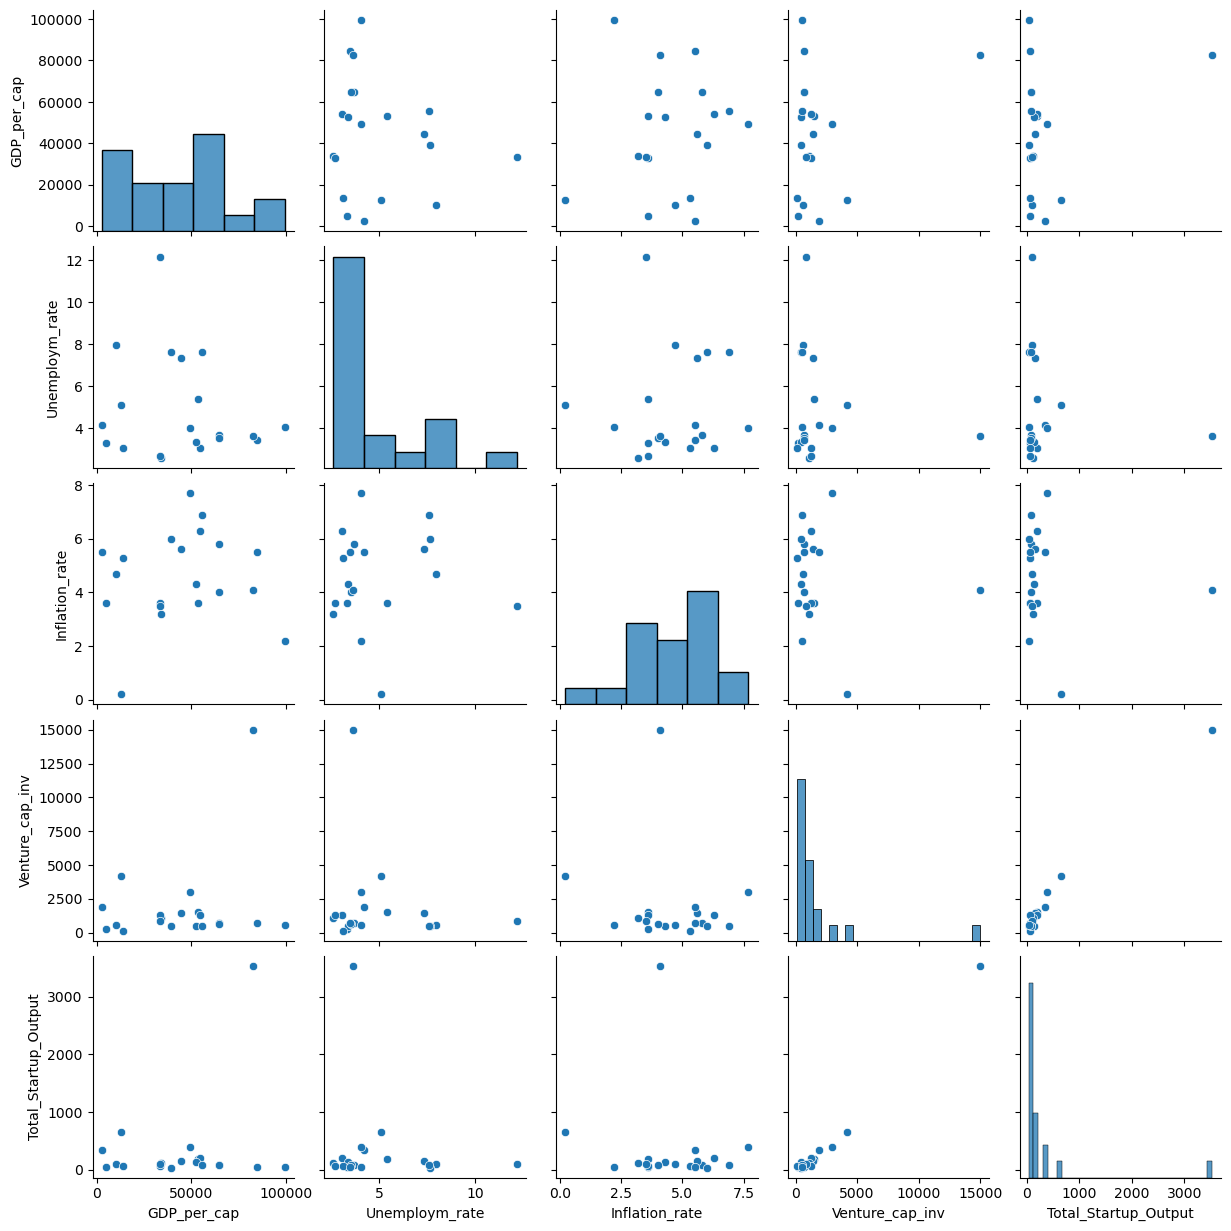

In [242]:
# РЕПРЕЗЕНТАТИВНЫЙ график для изначального датасета с 20 странами 
sns.pairplot(df_20[['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Venture_cap_inv', 'Total_Startup_Output']])
plt.show()

In [243]:
import statsmodels.api as sm

X = df_final[['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Gross_monthly_wage', 
              'Business_complexity_inx', 'Corporate_Tax_Rate', 'Venture_cap_inv']]
y = df_final['Total_Startup_Output']

X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов модели
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Total_Startup_Output   R-squared:                       0.943
Model:                              OLS   Adj. R-squared:                  0.936
Method:                   Least Squares   F-statistic:                     125.4
Date:                  Mon, 24 Mar 2025   Prob (F-statistic):           1.15e-30
Time:                          20:30:09   Log-Likelihood:                -368.89
No. Observations:                    61   AIC:                             753.8
Df Residuals:                        53   BIC:                             770.7
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

# РАНЖИРОВАНИЕ СТРАН ПО СОСТАВНОМУ ИНДЕКСУ

С ПОМОЩЬЮ СРЕДНЕГО ЗНАЧЕНИЯ

In [244]:
df_20['Venture_cap_inv'] = pd.to_numeric(df_20['Venture_cap_inv'], errors = 'coerce')
df_20['Corporate_Tax_Rate'] = df_20['Corporate_Tax_Rate'].str.rstrip('%').astype(float) / 100.0

In [245]:
# Преобразование столбцов в числа
df_20 = df_20[['Country', 'GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Gross_monthly_wage', 'Corporate_Tax_Rate', 'Venture_cap_inv', 'Total_Startup_Output']]

# Инвертируем показатели, где "чем меньше, тем лучше"
df_20_new = df_20
df_20_new['Unemploym_rate'] = 1 / df_20['Unemploym_rate']  # Безработица
df_20_new['Inflation_rate'] = 1 / df_20['Inflation_rate']  # Инфляция
df_20_new['Corporate_Tax_Rate'] = 1 / df_20['Corporate_Tax_Rate']  # Налоги

C:\Users\Яна\AppData\Local\Temp\ipykernel_14260\2834042044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_new['Unemploym_rate'] = 1 / df_20['Unemploym_rate']  # Безработица
C:\Users\Яна\AppData\Local\Temp\ipykernel_14260\2834042044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_new['Inflation_rate'] = 1 / df_20['Inflation_rate']  # Инфляция
C:\Users\Яна\AppData\Local\Temp\ipykernel_14260\2834042044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

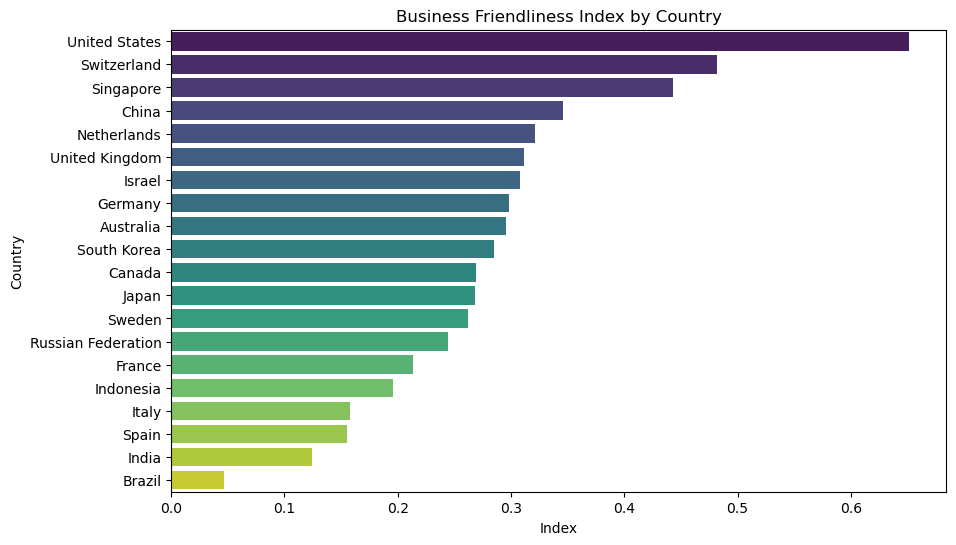

In [246]:
features = ['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Gross_monthly_wage', 
            'Corporate_Tax_Rate', 'Venture_cap_inv', 'Total_Startup_Output']

# Нормализация данных
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_20_new[features]), columns = features)

# Создание интегрального индекса (например, среднее значение)
df_normalized['Business_Friendliness_Index'] = df_normalized.mean(axis = 1)
df_normalized['Country'] = df_20['Country']
# Сортировка по индексу
df_normalized = df_normalized.sort_values(by = 'Business_Friendliness_Index', ascending = False)

# Визуализация
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Business_Friendliness_Index', y = 'Country', data = df_normalized, palette = 'viridis')
plt.title('Business Friendliness Index by Country')
plt.xlabel('Index')
plt.ylabel('Country')
plt.show()

С ПОМОЩЬЮ PCA

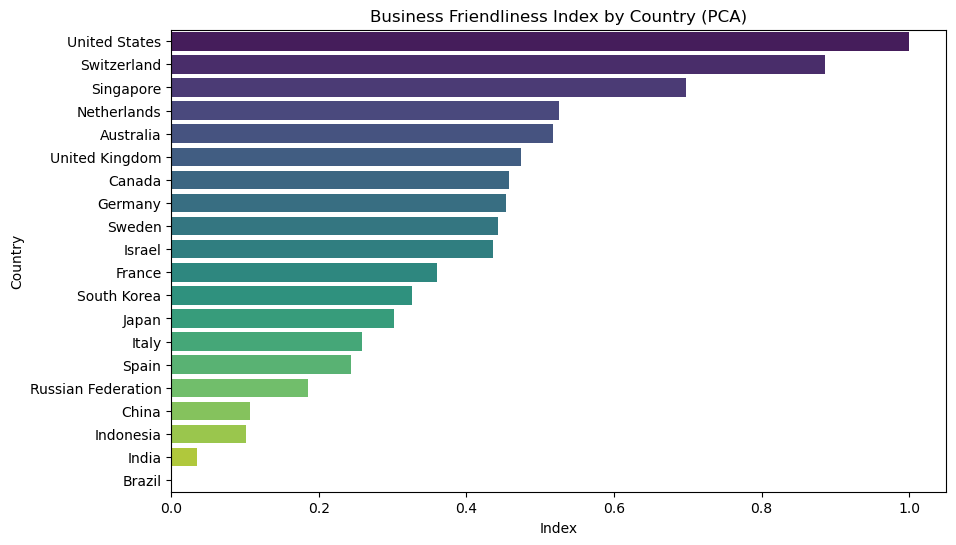

In [247]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Выбор нужных столбцов
features = ['GDP_per_cap', 'Unemploym_rate', 'Inflation_rate', 'Gross_monthly_wage', 
            'Corporate_Tax_Rate', 'Venture_cap_inv', 'Total_Startup_Output']

# Нормализация данных
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_20_new[features]), columns = features)
df_normalized['Country'] = df_20_new['Country']

# Применение PCA
pca = PCA(n_components = 1)
pca_values = pca.fit_transform(df_normalized[features])
pca_scaler = MinMaxScaler()
df_normalized['Business_Friendliness_Index'] = pca_scaler.fit_transform(pca_values)

# Сортировка по индексу
df_normalized = df_normalized.sort_values(by = 'Business_Friendliness_Index', ascending = False)

# Визуализация
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Business_Friendliness_Index', y = 'Country', data = df_normalized, palette = 'viridis')
plt.title('Business Friendliness Index by Country (PCA)')
plt.xlabel('Index')
plt.ylabel('Country')
plt.show()

# ПОСТРОЕНИЕ МОДЕЛИ

Для начала: наша цель - создать модель, чтобы в итоге можно было понять, подходит страна для бизнеса или нет (бинарная целевая переменная; 1 - страна подходит, 0 - страна не подходит)

Обоснование весов: ВВП на душу населения получил наибольший вес 0.3 по модулю, так как это ключевой показатель экономического развития

Уровень безработицы получил вес 0.2 по модулю, так как стабильность рынка труда критически важна для бизнеса

Остальные показатели получили вес 0.1 по модулю, так как они также важны, но в меньшей степени

In [248]:
df_final_without_complx = df_final[['Country', 'GDP_per_cap', 'Unemploym_rate', 'Inflation_rate',
       'Gross_monthly_wage', 'Corporate_Tax_Rate',
       'Venture_cap_inv', 'Total_Startup_Output']]

df_final_without_complx

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output
0,Algeria,5364.0,5.6,9.0,2878.4,26.0,1402.5,302.3
1,Argentina,14187.5,6.1,121.7,2878.4,35.0,1402.5,302.3
2,Australia,64820.9,3.7,5.8,5390.0,30.0,717.0,88.3
3,Austria,56033.6,5.3,7.8,4798.0,24.0,1402.5,302.3
4,Bangladesh,2551.0,5.6,9.0,351.0,27.5,1402.5,302.3
...,...,...,...,...,...,...,...,...
56,United Arab Emirates,49040.7,2.2,3.1,4000.0,9.0,356.0,302.3
57,United Kingdom,49463.9,4.0,7.7,4460.0,25.0,2992.0,385.1
58,United States,82769.4,3.6,4.1,6676.0,25.8,15000.0,3525.4
59,Venezuela,31588.4,5.6,360.0,150.0,34.0,1402.5,302.3


In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

weights = {
    'GDP_per_cap': 0.3,
    'Unemploym_rate': -0.2,
    'Inflation_rate': -0.1,
    'Gross_monthly_wage': 0.1,
    'Corporate_Tax_Rate': -0.1,
    'Venture_cap_inv': 0.1,
    'Total_Startup_Output': 0.1}


countries = df_final_without_complx['Country']

# Удаляем столбец 'Country' из данных перед нормализацией
df_final_numeric = df_final_without_complx.drop(columns = ['Country'])

# Нормализация данных (приведение к диапазону [0, 1])
scaler = MinMaxScaler()
df_final_scaled = pd.DataFrame(scaler.fit_transform(df_final_numeric), columns = df_final_numeric.columns)
 
# Добавляем столбец 'Country' обратно
df_final_scaled['Country'] = countries

# Расчет общей оценки
df_final_without_complx['Business_Score'] = (
    df_final_scaled['GDP_per_cap'] * weights['GDP_per_cap'] +
    df_final_scaled['Unemploym_rate'] * weights['Unemploym_rate'] +
    df_final_scaled['Inflation_rate'] * weights['Inflation_rate'] +
    df_final_scaled['Gross_monthly_wage'] * weights['Gross_monthly_wage'] +
    df_final_scaled['Corporate_Tax_Rate'] * weights['Corporate_Tax_Rate'] +
    df_final_scaled['Venture_cap_inv'] * weights['Venture_cap_inv'] +
    df_final_scaled['Total_Startup_Output'] * weights['Total_Startup_Output'])

# Создание целевой переменной
threshold = df_final_without_complx['Business_Score'].median()
df_final_without_complx['Business_Friendly'] = (df_final_without_complx['Business_Score'] > threshold).astype(int)
df_final_without_complx

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output,Business_Score,Business_Friendly
0,Algeria,5364.0,5.6,9.0,2878.4,26.0,1402.5,302.3,-0.039406,0
1,Argentina,14187.5,6.1,121.7,2878.4,35.0,1402.5,302.3,-0.082710,0
2,Australia,64820.9,3.7,5.8,5390.0,30.0,717.0,88.3,0.150622,1
3,Austria,56033.6,5.3,7.8,4798.0,24.0,1402.5,302.3,0.141102,1
4,Bangladesh,2551.0,5.6,9.0,351.0,27.5,1402.5,302.3,-0.082771,0
...,...,...,...,...,...,...,...,...,...,...
56,United Arab Emirates,49040.7,2.2,3.1,4000.0,9.0,356.0,302.3,0.183080,1
57,United Kingdom,49463.9,4.0,7.7,4460.0,25.0,2992.0,385.1,0.135467,1
58,United States,82769.4,3.6,4.1,6676.0,25.8,15000.0,3525.4,0.429855,1
59,Venezuela,31588.4,5.6,360.0,150.0,34.0,1402.5,302.3,-0.122692,0


                 Country  Business_Score  Business_Friendly
0                Algeria       -0.039406                  0
1              Argentina       -0.082710                  0
2              Australia        0.150622                  1
3                Austria        0.141102                  1
4             Bangladesh       -0.082771                  0
..                   ...             ...                ...
56  United Arab Emirates        0.183080                  1
57        United Kingdom        0.135467                  1
58         United States        0.429855                  1
59             Venezuela       -0.122692                  0
60               Vietnam        0.046580                  1

[61 rows x 3 columns]
Business_Friendly
0    31
1    30
Name: count, dtype: int64


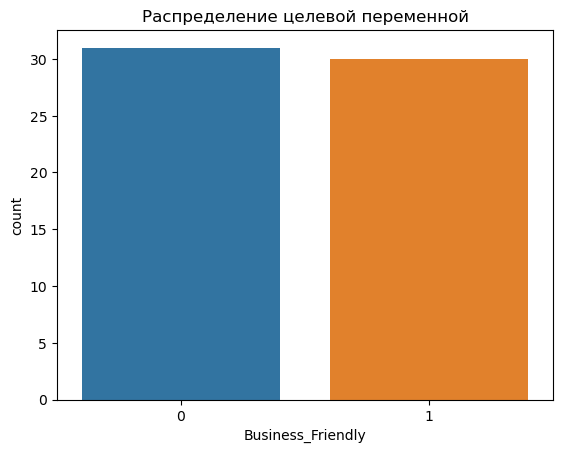

In [250]:
# Проверка распределения
print(df_final_without_complx[['Country', 'Business_Score', 'Business_Friendly']])
print(df_final_without_complx['Business_Friendly'].value_counts())

# Визуализация
sns.countplot(x = 'Business_Friendly', data = df_final_without_complx)
plt.title('Распределение целевой переменной')
plt.show()

In [251]:
X = df_final_without_complx.drop(columns = ['Business_Friendly', 'Business_Score'])
y = df_final_without_complx['Business_Friendly']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.drop(columns = ['Country'])
X_test = X_test.drop(columns = ['Country'])

from sklearn.ensemble import RandomForestClassifier

# Создание модели
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [252]:
from sklearn.metrics import accuracy_score

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.85


In [253]:
from sklearn.metrics import classification_report

# Отчет о классификации
print('Отчет о классификации:')
print(classification_report(y_test, y_pred))

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13



In [254]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация (например, 5 фолдов)
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

# Средняя точность по кросс-валидации
print(f'Точность по кросс-валидации: {cv_scores.mean():.2f}')

Точность по кросс-валидации: 0.79


ROC-AUC: 0.95


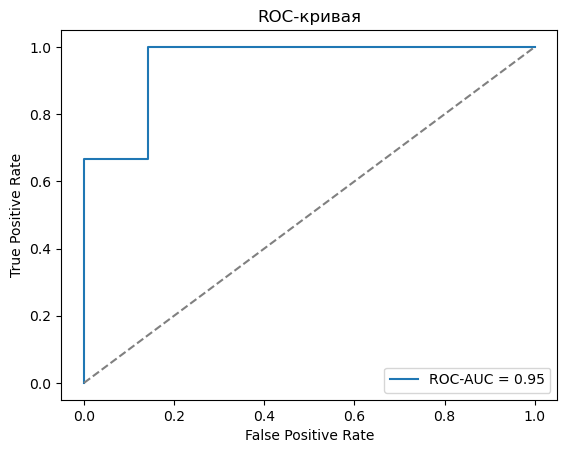

In [255]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Предсказание вероятностей для положительного класса
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Расчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.2f}')

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Важность признаков:
                Feature  Importance
0           GDP_per_cap    0.437005
3    Gross_monthly_wage    0.194938
1        Unemploym_rate    0.146211
4    Corporate_Tax_Rate    0.100856
2        Inflation_rate    0.063490
5       Venture_cap_inv    0.030439
6  Total_Startup_Output    0.027061


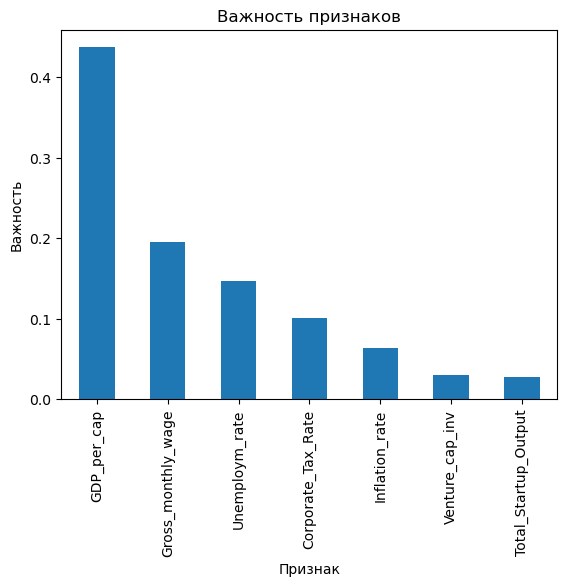

In [256]:
import pandas as pd

# Важность признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Создание DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print('Важность признаков:')
print(importance_df)

# Визуализация важности признаков
importance_df.plot(kind = 'bar', x = 'Feature', y = 'Importance', legend = False)
plt.title('Важность признаков')
plt.ylabel('Важность')
plt.xlabel('Признак')
plt.show()

In [257]:
# Проверим на рандомных данных, где одна страна с хорошими показателями, а вторая с плохими
new_data = {
    'GDP_per_cap': [45000, 28000],
    'Unemploym_rate': [6, 8],
    'Inflation_rate': [2, 4],
    'Gross_monthly_wage': [3200, 2400],
    'Corporate_Tax_Rate': [16, 22],
    'Venture_cap_inv': [220, 180],
    'Total_Startup_Output': [650, 480]}

new_df = pd.DataFrame(new_data)

new_predictions = model.predict(new_df)
print('Предсказания для новых данных:')
print(new_predictions)

Предсказания для новых данных:
[1 0]


# Проверка гипотезы "Страны с более высоким ВВП на душу населения более благоприятны для стартапов"

In [258]:
1 / 7

0.14285714285714285

In [259]:
weights_equal = {
    'GDP_per_cap': 0.14285714285714285,
    'Unemploym_rate': -0.14285714285714285,
    'Inflation_rate': -0.14285714285714285,
    'Gross_monthly_wage': 0.14285714285714285,
    'Corporate_Tax_Rate': -0.14285714285714285,
    'Venture_cap_inv': 0.14285714285714285,
    'Total_Startup_Output': 0.14285714285714285}

countries = df_final_without_complx['Country']

# Удаляем столбец 'Country' из данных перед нормализацией
df_final_numeric = df_final_without_complx.drop(columns = ['Country'])

# Нормализация данных (приведение к диапазону [0, 1])
scaler = MinMaxScaler()
df_final_scaled = pd.DataFrame(scaler.fit_transform(df_final_numeric), columns = df_final_numeric.columns)
 
# Добавляем столбец 'Country' обратно
df_final_scaled['Country'] = countries

# Расчет общей оценки
df_final_without_complx['Business_Score'] = (
    df_final_scaled['GDP_per_cap'] * weights['GDP_per_cap'] +
    df_final_scaled['Unemploym_rate'] * weights['Unemploym_rate'] +
    df_final_scaled['Inflation_rate'] * weights['Inflation_rate'] +
    df_final_scaled['Gross_monthly_wage'] * weights['Gross_monthly_wage'] +
    df_final_scaled['Corporate_Tax_Rate'] * weights['Corporate_Tax_Rate'] +
    df_final_scaled['Venture_cap_inv'] * weights['Venture_cap_inv'] +
    df_final_scaled['Total_Startup_Output'] * weights['Total_Startup_Output'])

# Создание целевой переменной
threshold = df_final_without_complx['Business_Score'].median()
df_final_without_complx['Business_Friendly'] = (df_final_without_complx['Business_Score'] > threshold).astype(int)
df_final_without_complx

,Country,GDP_per_cap,Unemploym_rate,Inflation_rate,Gross_monthly_wage,Corporate_Tax_Rate,Venture_cap_inv,Total_Startup_Output,Business_Score,Business_Friendly
0,Algeria,5364.0,5.6,9.0,2878.4,26.0,1402.5,302.3,-0.039406,0
1,Argentina,14187.5,6.1,121.7,2878.4,35.0,1402.5,302.3,-0.082710,0
2,Australia,64820.9,3.7,5.8,5390.0,30.0,717.0,88.3,0.150622,1
3,Austria,56033.6,5.3,7.8,4798.0,24.0,1402.5,302.3,0.141102,1
4,Bangladesh,2551.0,5.6,9.0,351.0,27.5,1402.5,302.3,-0.082771,0
...,...,...,...,...,...,...,...,...,...,...
56,United Arab Emirates,49040.7,2.2,3.1,4000.0,9.0,356.0,302.3,0.183080,1
57,United Kingdom,49463.9,4.0,7.7,4460.0,25.0,2992.0,385.1,0.135467,1
58,United States,82769.4,3.6,4.1,6676.0,25.8,15000.0,3525.4,0.429855,1
59,Venezuela,31588.4,5.6,360.0,150.0,34.0,1402.5,302.3,-0.122692,0


Важность признаков:
                Feature  Importance
0           GDP_per_cap    0.437005
3    Gross_monthly_wage    0.194938
1        Unemploym_rate    0.146211
4    Corporate_Tax_Rate    0.100856
2        Inflation_rate    0.063490
5       Venture_cap_inv    0.030439
6  Total_Startup_Output    0.027061


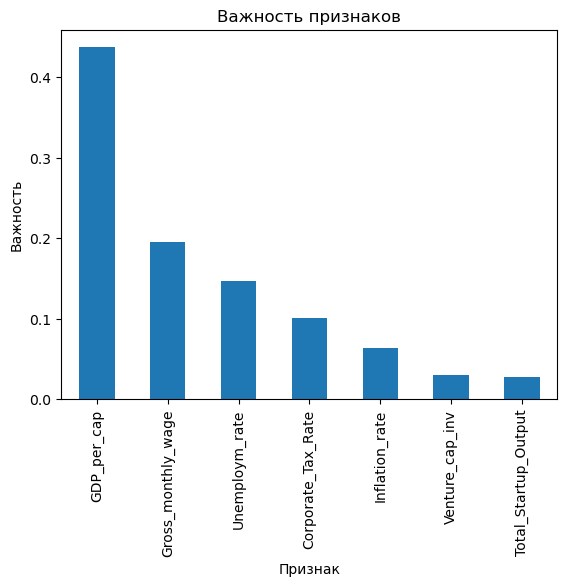

In [260]:
# Важность признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Создание DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print('Важность признаков:')
print(importance_df)

# Визуализация важности признаков
importance_df.plot(kind = 'bar', x = 'Feature', y = 'Importance', legend = False)
plt.title('Важность признаков')
plt.ylabel('Важность')
plt.xlabel('Признак')
plt.show()

В нашей модели, независимо от весов, ВВП это самый главный фактор, определяющий благоприятность страны для стартапа